<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Pipepline_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'imblearn'

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/MpRonald/datasets/main/fraud_dataset_example.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
data = data[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.8+ MB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
amount,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
oldbalanceOrg,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
newbalanceOrig,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
oldbalanceDest,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
newbalanceDest,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02
isFraud,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00


In [13]:
data.isFraud.value_counts()

0    101497
1       116
Name: isFraud, dtype: int64

In [14]:
dataset = data[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                'oldbalanceDest', 'newbalanceDest', 'isFraud']]

In [15]:
dataset = pd.get_dummies(data=dataset, columns=['type'])

In [16]:
dataset.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   amount          101613 non-null  float64
 2   oldbalanceOrg   101613 non-null  float64
 3   newbalanceOrig  101613 non-null  float64
 4   oldbalanceDest  101613 non-null  float64
 5   newbalanceDest  101613 non-null  float64
 6   isFraud         101613 non-null  int64  
 7   type_CASH_IN    101613 non-null  uint8  
 8   type_CASH_OUT   101613 non-null  uint8  
 9   type_DEBIT      101613 non-null  uint8  
 10  type_PAYMENT    101613 non-null  uint8  
 11  type_TRANSFER   101613 non-null  uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 5.9 MB


In [18]:
dataset.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [19]:
dataset = dataset[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'isFraud']]

In [20]:
X = dataset.iloc[:, 0:11]
X.shape

(101613, 11)

In [21]:
y = dataset.iloc[:,11]
y.shape

(101613,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30452
           1       0.43      0.09      0.15        32

    accuracy                           1.00     30484
   macro avg       0.71      0.55      0.58     30484
weighted avg       1.00      1.00      1.00     30484



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


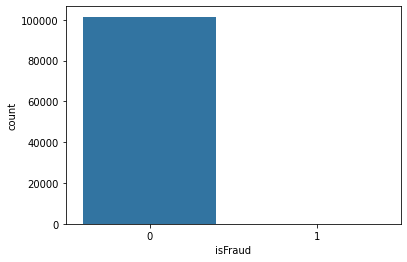

In [26]:
sns.countplot(data.isFraud)

In [27]:
np.unique(data.isFraud, return_counts=True)

(array([0, 1]), array([101497,    116]))

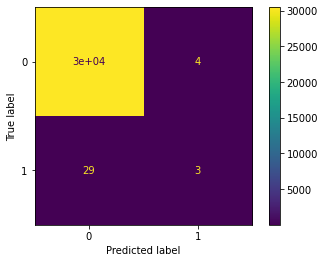

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [29]:
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob) # define a curva ROC
auc = metrics.roc_auc_score(y_test, y_prob)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(auc, 3)*10)}')

Curva ROC: 9.58


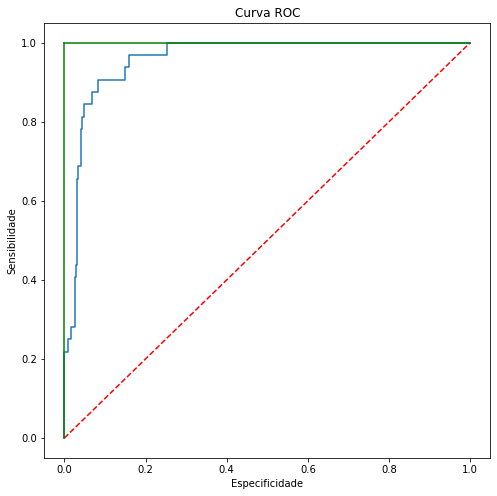

In [30]:
plt.subplots(1, figsize=(8,8))
plt.title("Curva ROC")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()

# Data Balance

In [31]:
sm = SMOTE(random_state=123)

In [32]:
X = dataset.iloc[:, 0:11]
X.shape

(101613, 11)

In [33]:
y = dataset.iloc[:,11]
y.shape

(101613,)

In [34]:
X_sm, y_sm = sm.fit_resample(X, y)

In [35]:
data_bal = pd.concat([X_sm, y_sm], axis=1)
data_bal.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,0


In [36]:
data_bal.isFraud.value_counts()

0    101497
1    101497
Name: isFraud, dtype: int64

In [37]:
data.isFraud.value_counts()

0    101497
1       116
Name: isFraud, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

# Logistic Regression

In [39]:
lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)

In [40]:
y_pred = lr.predict(X_test)

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     30449
           1       0.92      0.96      0.94     30450

    accuracy                           0.94     60899
   macro avg       0.94      0.94      0.94     60899
weighted avg       0.94      0.94      0.94     60899



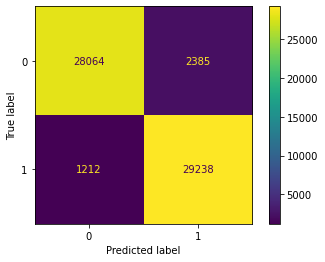

In [42]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [43]:
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob) # define a curva ROC
auc = metrics.roc_auc_score(y_test, y_prob)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(auc, 3)*10)}')

Curva ROC: 9.629999999999999


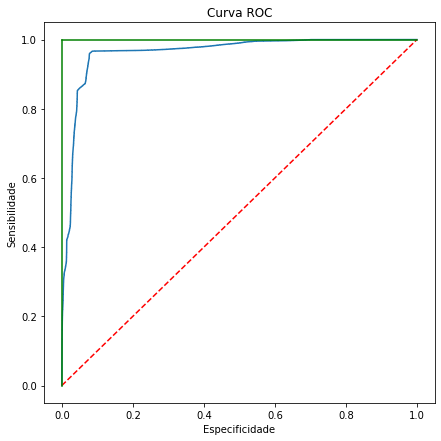

In [44]:
plt.subplots(1, figsize=(7,7))
plt.title("Curva ROC")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()

# Decision Tree

In [45]:
tree = DecisionTreeClassifier(max_depth=6, random_state=123).fit(X_train, y_train)

In [46]:
y_pred = tree.predict(X_test)

In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     30449
           1       0.97      0.98      0.97     30450

    accuracy                           0.97     60899
   macro avg       0.97      0.97      0.97     60899
weighted avg       0.97      0.97      0.97     60899



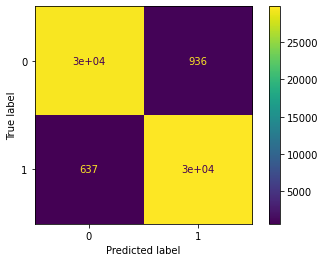

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [49]:
y_prob = tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob) # define a curva ROC
auc = metrics.roc_auc_score(y_test, y_prob)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(auc, 3)*10)}')

Curva ROC: 9.92


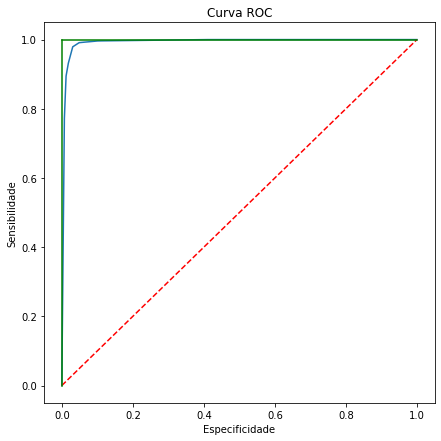

In [50]:
plt.subplots(1, figsize=(7,7))
plt.title("Curva ROC")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()

# Random Forest

In [51]:
random = RandomForestClassifier(max_depth=6, random_state=123).fit(X_train, y_train)

In [52]:
y_pred = tree.predict(X_test)

In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     30449
           1       0.97      0.98      0.97     30450

    accuracy                           0.97     60899
   macro avg       0.97      0.97      0.97     60899
weighted avg       0.97      0.97      0.97     60899



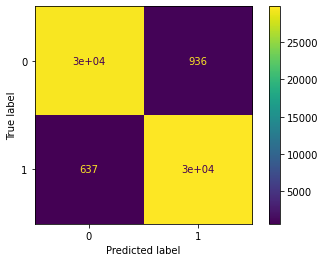

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [55]:
y_prob = random.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob) # define a curva ROC
auc = metrics.roc_auc_score(y_test, y_prob)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(auc, 3)*10)}')

Curva ROC: 9.98


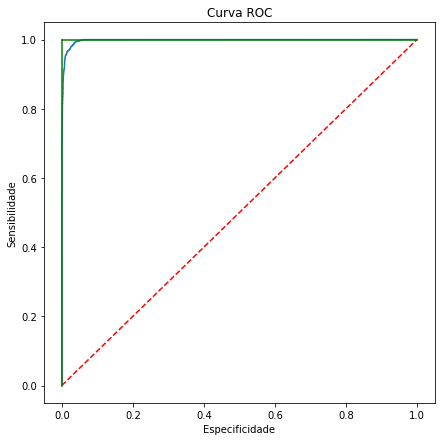

In [56]:
plt.subplots(1, figsize=(7,7))
plt.title("Curva ROC")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()

# Randomized SearchCV

In [76]:
n_estimators = np.arange(20,200, step=20)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(2,10, step=1))
min_samples_split = np.arange(2,10, step=2)
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

In [77]:
param_grid = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}

In [78]:
random = RandomForestClassifier(random_state=42)

In [79]:
random_cv = RandomizedSearchCV(random, param_grid, n_iter=5,
                               scoring='recall', n_jobs=-1, random_state=42)

In [81]:
%%time
rcv = random_cv.fit(X_train, y_train)

CPU times: user 28.4 s, sys: 269 ms, total: 28.7 s
Wall time: 3min 37s


In [84]:
data_rcv = pd.DataFrame(rcv.cv_results_)

In [85]:
data_rcv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,32.942720,0.584906,0.715860,0.236513,160,8,1,sqrt,8,gini,False,"{'n_estimators': 160, 'min_samples_split': 8, ...",0.992258,0.995003,0.994722,0.995426,0.991274,0.993737,0.001654,1
1,11.083147,0.220006,0.335967,0.023034,120,8,4,sqrt,4,gini,True,"{'n_estimators': 120, 'min_samples_split': 8, ...",0.958196,0.961222,0.962418,0.965658,0.959747,0.961448,0.002537,3
2,13.223430,0.112680,0.409714,0.007670,180,6,4,sqrt,2,gini,False,"{'n_estimators': 180, 'min_samples_split': 6, ...",0.944331,0.945668,0.945457,0.946587,0.944194,0.945248,0.000890,5
3,11.763855,0.049255,0.372270,0.012953,160,2,1,auto,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.947357,0.947920,0.947498,0.949120,0.947150,0.947809,0.000702,4
4,3.805997,0.187665,0.111670,0.010919,40,4,1,log2,3,gini,False,"{'n_estimators': 40, 'min_samples_split': 4, '...",0.974382,0.971145,0.974523,0.974947,0.972555,0.973510,0.001439,2


In [86]:
rcv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 160}

In [87]:
rf = RandomForestClassifier(**rcv.best_params_, random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [88]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30449
           1       0.99      0.99      0.99     30450

    accuracy                           0.99     60899
   macro avg       0.99      0.99      0.99     60899
weighted avg       0.99      0.99      0.99     60899



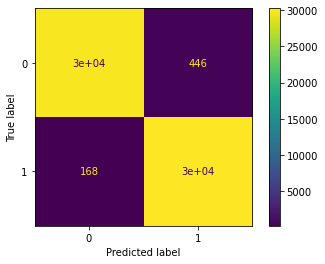

In [89]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [92]:
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob) # define a curva ROC
auc = metrics.roc_auc_score(y_test, y_prob)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(auc, 3)*10)}')

Curva ROC: 10.0


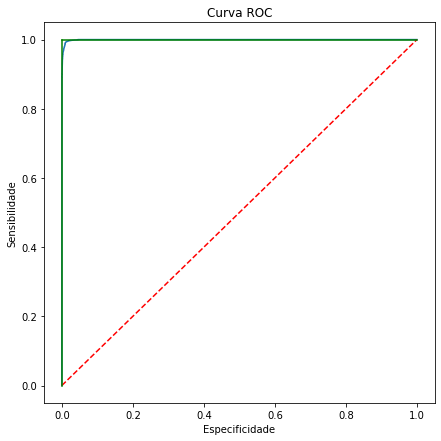

In [93]:
plt.subplots(1, figsize=(7,7))
plt.title("Curva ROC")
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()